# <span style='color:white;'> Data Analysis with Pandas</span>
Below are the approaches used to complete the task:
- Program in Python using Jupyter Notebook.
- Perform data analysis using Pandas.
- Perform data pre-processing methods.
- Analyse and summarise the dataset by finding facts from the data.

In this notebook, we will use Pandas to read the **customers** dataset and perform some basic analysis to improve our understanding of the dataset by completing the notebook.

We will also use matplotlib to visualise the data.

In this notebook, we will apply data pre-processing, a vital data mining phase. We will use **sklearn** for algorithms for data mining (and machine learning).

### <span style='color:white;'> Exploratory analysis: Loading and exploring the dataset</span>

Let's read the dataset into a data frame and perform some basic analysis to gain a firsthand understanding of the dataset we are working on, such as its minimum and maximum values, whether there are NULL values in the dataset, etc.

Before we build the models or form any hypothesis, we must gain these useful insights into the dataset. This will give us a direction for what type of stories can be discovered for the given dataset.

### <span style='color:white;'>Pandas library:</span> 
Pandas is a Python package that is handy while working with data files. It is used for data analysis, such as operation, pre-processing, manipulation and munging.

In [8]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
# Loading the dataset to a dataframe
data = pd.read_csv('Customers.csv')
data.head()

,CustomerKey,Country,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,class_label
0,11000,Australia,43,M,M,90000,2,0,Bachelors,Professional,1,0,> 50K
1,11001,Australia,38,S,M,60000,3,3,Bachelors,Professional,0,1,> 50K
2,11002,Australia,43,M,M,60000,3,3,Bachelors,Professional,1,1,> 50K
3,11003,Australia,41,S,F,70000,0,0,Bachelors,Professional,0,1,> 50K
4,11004,Australia,35,S,F,80000,5,5,Bachelors,Professional,1,4,> 50K


The above cell display the first five rows of the dataframe.

In [172]:
data.tail()

,CustomerKey,Country,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,class_label
18479,29479,France,45,M,M,30000,1,0,Graduate Degree,Clerical,1,0,<= 50K
18480,29480,United Kingdom,37,S,F,30000,3,0,Graduate Degree,Clerical,1,0,<= 50K
18481,29481,Germany,49,S,M,30000,3,0,Graduate Degree,Clerical,0,0,<= 50K
18482,29482,France,50,M,M,30000,3,0,Bachelors,Clerical,1,0,<= 50K
18483,29483,France,49,M,M,30000,0,0,Bachelors,Clerical,1,0,<= 50K


The above cell display the bottom last five rows of the dataframe.

In [175]:
data.shape

(18484, 13)

The data.shape tells us the dimensionality of the dataset. In this case, there are 18484 rows and 13 columns. 

Let's exclude 'CustomerKey' from the descriptive statistics that summarise the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.,

In [179]:
cols = set(data.columns) - {'CustomerKey'}
data1 = data[list(cols)]
data1.describe()

,Age,NumberCarsOwned,NumberChildrenAtHome,HouseOwnerFlag,YearlyIncome,TotalChildren
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,45.176531,1.502705,1.004058,0.676369,57305.777970,1.844352
std,11.536142,1.138394,1.522660,0.467874,32285.841703,1.612408
min,28.000000,0.000000,0.000000,0.000000,10000.000000,0.000000
25%,36.000000,1.000000,0.000000,0.000000,30000.000000,0.000000
50%,43.000000,2.000000,0.000000,1.000000,60000.000000,2.000000
75%,53.000000,2.000000,2.000000,1.000000,70000.000000,3.000000
max,98.000000,4.000000,5.000000,1.000000,170000.000000,5.000000


- **Count** matches the total rows, so no missing values exist.
- The mean age is 45 years.
- The mean YearlyIncome is 57,305.78.
- The minimum yearly income is 10,000, while the maximum is 170,000.
- Standard deviation 32285 for '**YearlyIncome**' indicates dispersion from the mean.

In [182]:
data['HouseOwnerFlag'].value_counts()

1    12502
0     5982
Name: HouseOwnerFlag, dtype: int64

- The cell above shows the number customers how owners house and those who don't.

In [185]:
data['NumberCarsOwned'].value_counts()

2    6457
1    4883
0    4238
3    1645
4    1261
Name: NumberCarsOwned, dtype: int64

- The cell above tells us the number of cars each customer owned.

Let's visualise 'Age' through graphs instead to make observations.

<AxesSubplot:>

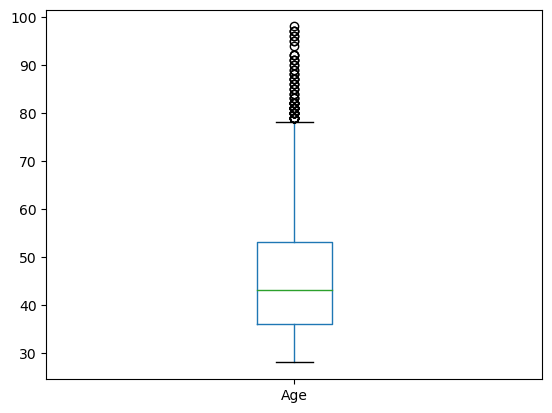

In [191]:
data.boxplot(column='Age', grid=0)

<AxesSubplot:>

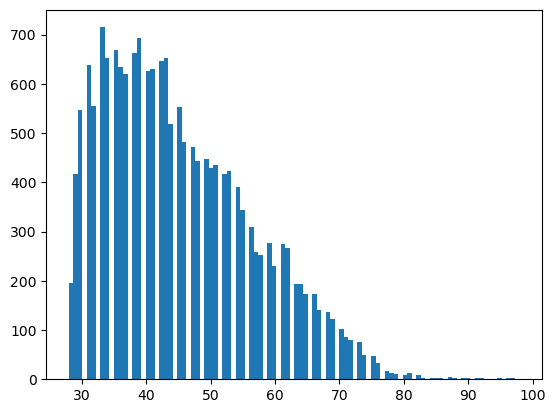

In [193]:
data['Age'].hist(bins=100, grid=0)

In [195]:
data.columns

Index(['CustomerKey', 'Country', 'Age', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education',
       'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'class_label'],
      dtype='object')

In [197]:
data['Country'].value_counts()

United States     7819
Australia         3591
United Kingdom    1913
France            1810
Germany           1780
Canada            1571
Name: Country, dtype: int64

- United States has the largest customer based follow by Australia while the country with the lowest customer based is Canada.

In [200]:
data['MaritalStatus'].value_counts()

M    10011
S     8473
Name: MaritalStatus, dtype: int64

- The above cell tells us the number customers married and single.

In [203]:
data['Gender'].value_counts()

M    9351
F    9133
Name: Gender, dtype: int64

- The cell above tells the number female customers and male customers.

In [208]:
data['Occupation'].value_counts()

Professional      5520
Skilled Manual    4577
Management        3075
Clerical          2928
Manual            2384
Name: Occupation, dtype: int64

- The above cell shows frequency distribution of occupation by customers. 

In [210]:
data['Education'].value_counts()

Bachelors              5356
Partial College        5064
High School            3294
Graduate Degree        3189
Partial High School    1581
Name: Education, dtype: int64

- The above cell shows frequency distribution of Education by customers. 

### <span style='color:white;'> Apply groupby functions in order to summarise the data.</span>

Groupby functions are usually used with aggregate functions, which are useful to summarise the dataset and make observations. Some common functions are **SUM**, **MEAN**, **MIN**, **MAX**, and **COUNT**. <b>Using groupby we can answer questions such as:</b>

- <b>Question: What is the average of each gender in a given population?</b>


In [214]:
data['Age'].groupby([data['Gender']]).mean()

Gender
F    45.198839
M    45.154743
Name: Age, dtype: float64

In the above cell, we group by 'Gender' and computed the mean 'Age'.

- What is the average age of male and female across different education categories?

In [218]:
data['Age'].groupby([data['Gender'], data['Education']]).mean()

Gender  Education          
F       Bachelors              45.176941
        Graduate Degree        45.764122
        High School            45.211912
        Partial College        44.968922
        Partial High School    44.816380
M       Bachelors              45.144428
        Graduate Degree        46.351711
        High School            45.284285
        Partial College        44.495242
        Partial High School    44.648058
Name: Age, dtype: float64

In the above code we have group by 'Gender' and 'Education' and computed the mean 'Age' of a given population.

In [221]:
data['Age'].groupby([data['Gender'], data['Education']]).max()

Gender  Education          
F       Bachelors              92
        Graduate Degree        89
        High School            97
        Partial College        95
        Partial High School    98
M       Bachelors              87
        Graduate Degree        85
        High School            97
        Partial College        86
        Partial High School    97
Name: Age, dtype: int64

In the above code, we group by 'Gender' and 'Education' and computed maximum 'Age' in the given population.

In [224]:
data['Age'].groupby([data['Gender'], data['Occupation']]).min()

Gender  Occupation    
F       Clerical          28
        Management        28
        Manual            28
        Professional      28
        Skilled Manual    28
M       Clerical          28
        Management        28
        Manual            28
        Professional      28
        Skilled Manual    28
Name: Age, dtype: int64

In the above code, we group by 'Gender' and 'Occupation' and computed minimum 'Age' in the given population.

## <span style='color:white;'>Data visualisation</span>

<b> Matplotlib is python library for visualising data in the form of graphs such as histograms, scatter, box plot, line plots, heat plots, etc.</b>

<AxesSubplot:title={'center':'Age'}, xlabel='Education'>

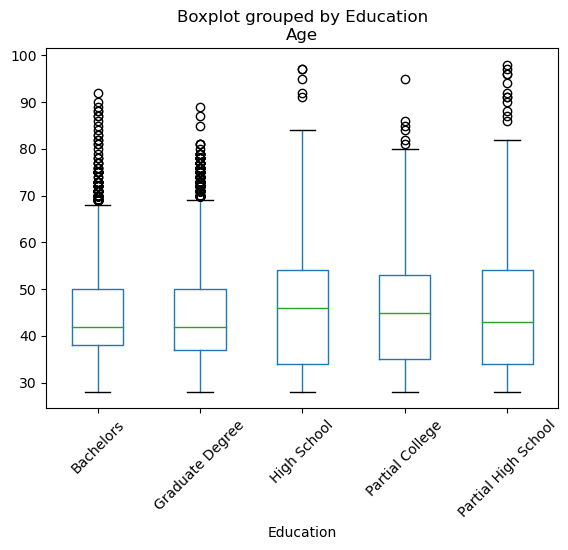

In [228]:
data.boxplot(column='Age', by = 'Education', grid=False, rot=45, fontsize=10)

<AxesSubplot:title={'center':'Age'}, xlabel='Occupation'>

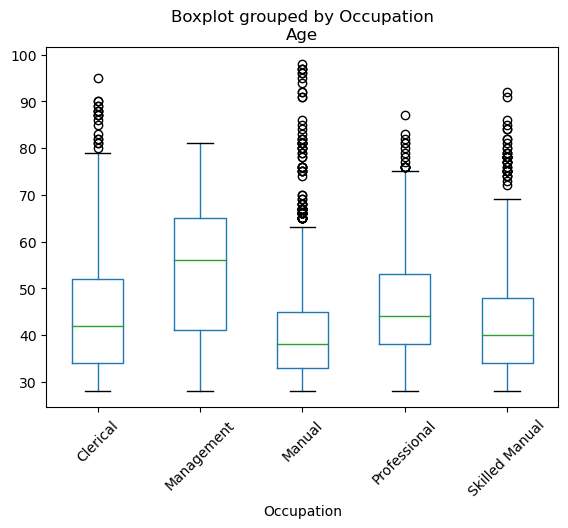

In [232]:
data.boxplot(column='Age', by ='Occupation', grid=0, rot = 45, fontsize =10)

<b>After performing some basic data analysis, let's look at data pre-processing to improve the dataset's quality.</b>

Data pre-processing is an essential step in the process. Row data can be unstructured and full of noise. The aim of this phase is to clean the row data, reduce noise, and prepare the dataset that the algorithm can accept as input.

<b> Check for NULL values in the dataset</b>

Earlier, we used the 'discribe()' function, which indicates there are no NULL values in the dataset. However, we will use the code below to check for NULL values once again.

In [236]:
data.apply(lambda x: sum(x.isnull()), axis =0)

CustomerKey             0
Country                 0
Age                     0
MaritalStatus           0
Gender                  0
YearlyIncome            0
TotalChildren           0
NumberChildrenAtHome    0
Education               0
Occupation              0
HouseOwnerFlag          0
NumberCarsOwned         0
class_label             0
dtype: int64

## <span style='color:white;'> Data transformation</span>

Some attributes are categorical; therefore, (statistical) analysis of them is not possible. We need to convert all categorical variables (string labels) into numeric by encoding them. Package 'sklearn' provides a 'LabelEncoder' library for encoding labels between 0 to n-1 discrete values/labels, where n is the number of values/labels. E.g.:

<div style="text-align:center"> Male -> 0 </div>

<div style="text-align:center"> Female -> 1 </div>

In [239]:
from sklearn.preprocessing import LabelEncoder

In [241]:
data.head()

,CustomerKey,Country,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,class_label
0,11000,Australia,43,M,M,90000,2,0,Bachelors,Professional,1,0,> 50K
1,11001,Australia,38,S,M,60000,3,3,Bachelors,Professional,0,1,> 50K
2,11002,Australia,43,M,M,60000,3,3,Bachelors,Professional,1,1,> 50K
3,11003,Australia,41,S,F,70000,0,0,Bachelors,Professional,0,1,> 50K
4,11004,Australia,35,S,F,80000,5,5,Bachelors,Professional,1,4,> 50K


In [243]:
data.dtypes

CustomerKey              int64
Country                 object
Age                      int64
MaritalStatus           object
Gender                  object
YearlyIncome             int64
TotalChildren            int64
NumberChildrenAtHome     int64
Education               object
Occupation              object
HouseOwnerFlag           int64
NumberCarsOwned          int64
class_label             object
dtype: object

In [245]:
columns = list(data.select_dtypes(exclude=['int64']))
columns

['Country',
 'MaritalStatus',
 'Gender',
 'Education',
 'Occupation',
 'class_label']

In [247]:
data['class_label'].value_counts()

 > 50K      9858
 <= 50K     8626
Name: class_label, dtype: int64

In [249]:
le = LabelEncoder()
for i in columns:
    #print(i)
    data[i] = le.fit_transform(data[i])
data.dtypes

CustomerKey             int64
Country                 int32
Age                     int64
MaritalStatus           int32
Gender                  int32
YearlyIncome            int64
TotalChildren           int64
NumberChildrenAtHome    int64
Education               int32
Occupation              int32
HouseOwnerFlag          int64
NumberCarsOwned         int64
class_label             int32
dtype: object

In [251]:
data.head()

,CustomerKey,Country,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,class_label
0,11000,0,43,0,1,90000,2,0,0,3,1,0,1
1,11001,0,38,1,1,60000,3,3,0,3,0,1,1
2,11002,0,43,0,1,60000,3,3,0,3,1,1,1
3,11003,0,41,1,0,70000,0,0,0,3,0,1,1
4,11004,0,35,1,0,80000,5,5,0,3,1,4,1


In [253]:
data['Occupation'].value_counts()

3    5520
4    4577
1    3075
0    2928
2    2384
Name: Occupation, dtype: int64

We can see all the values are now numeric. Now, more computation and analysis can be performed on the dataset.

<AxesSubplot:>

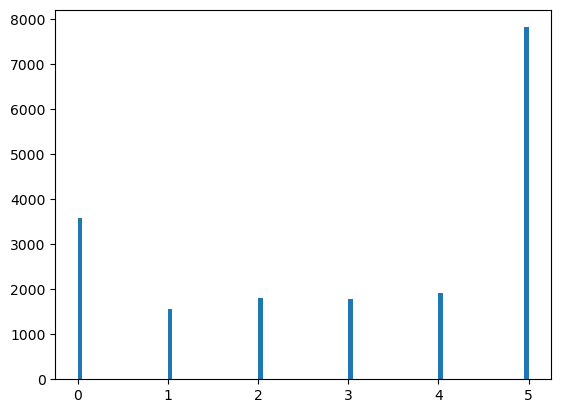

In [256]:
data['Country'].hist(bins=100, grid=0)

In [167]:
data.describe(include='all')

,CustomerKey,Country,Age,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,NumberCarsOwned,class_label
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,20241.500000,3.098788,45.176531,0.458396,0.505897,57305.777970,1.844352,1.004058,1.692978,2.310701,0.676369,1.502705,0.533326
std,5336.015523,1.993085,11.536142,0.498280,0.499979,32285.841703,1.612408,1.522660,1.361441,1.411622,0.467874,1.138394,0.498902
min,11000.000000,0.000000,28.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15620.750000,1.000000,36.000000,0.000000,0.000000,30000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,20241.500000,4.000000,43.000000,0.000000,1.000000,60000.000000,2.000000,0.000000,2.000000,3.000000,1.000000,2.000000,1.000000
75%,24862.250000,5.000000,53.000000,1.000000,1.000000,70000.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,1.000000
max,29483.000000,5.000000,98.000000,1.000000,1.000000,170000.000000,5.000000,5.000000,4.000000,4.000000,1.000000,4.000000,1.000000


<span style='color:white;'>Conclusion:</span>

- We performed some basic anaylsis which improved our understanding of the dataset.
- We applied group by functions to summarise the data.
- We performed data visualisation with the application of Matplotlib which is a python library for visualising data in the form graphs. 
- After performing some basic data analysis, we then performed data pre-processing which improved the quality of our dataset.